In [1]:
#import required imports
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import seaborn as sns
import datetime as dt

## Prepare the Data

In [2]:
# Reading in CSV's
whale_returns_csv = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv,index_col='Date',parse_dates=True,infer_datetime_format=True)
whale_df.sort_index(ascending=True)

algo_returns_csv = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv,parse_dates=True,index_col='Date',infer_datetime_format=True)
algo_df.sort_index(ascending=True)

sp500_history_csv = Path("sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv,index_col='Date',parse_dates=True,infer_datetime_format=True)
sp500_df.sort_index(ascending=True,inplace=True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
#Count nulls for whale
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls for whale
whale_df = whale_df.dropna()

In [5]:
# Check to make sure nulls have been dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
#Count nulls for algo
algo_df.isnull().mean()*100
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
#Drop nulls and check to make sure they have been dropped
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
#S&P 500 Closing Prices
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types 
sp500_df.dtypes

Close    object
dtype: object

In [11]:
#Fix Data Types (Convert from an object to a float)
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')

In [12]:
#Check to make sure type has been changed
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtypes

dtype('float64')

In [13]:
#Calculte S&P 500 Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
#Check for nulls in S&P 500
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [15]:
#Drop nulls and check to make sure nulls have been dropped
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [16]:
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [17]:
#Rename column from 'Close' to 'S&P 500'
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [56]:
#Combine the 3 dataframes into 1
combined_returns = pd.concat([sp500_daily_returns,algo_df,whale_df],axis='columns',join='inner')
combined_returns.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


## Quantitative Analysis

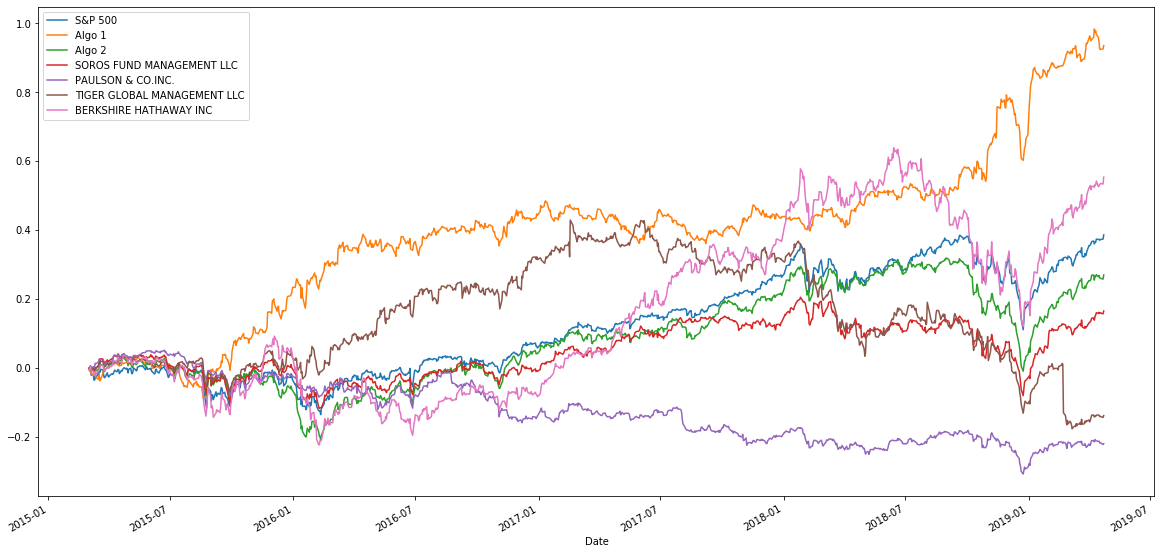

In [52]:
# Plot cumulative returns for the combined dataframe
cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns.plot(figsize=(20,10))

We can see from our plot that Algo 1 and Berkshire Hathaway, the orange and pink lines respectively, have outperformed the S&P 500, the blue line

## Risk Analysis

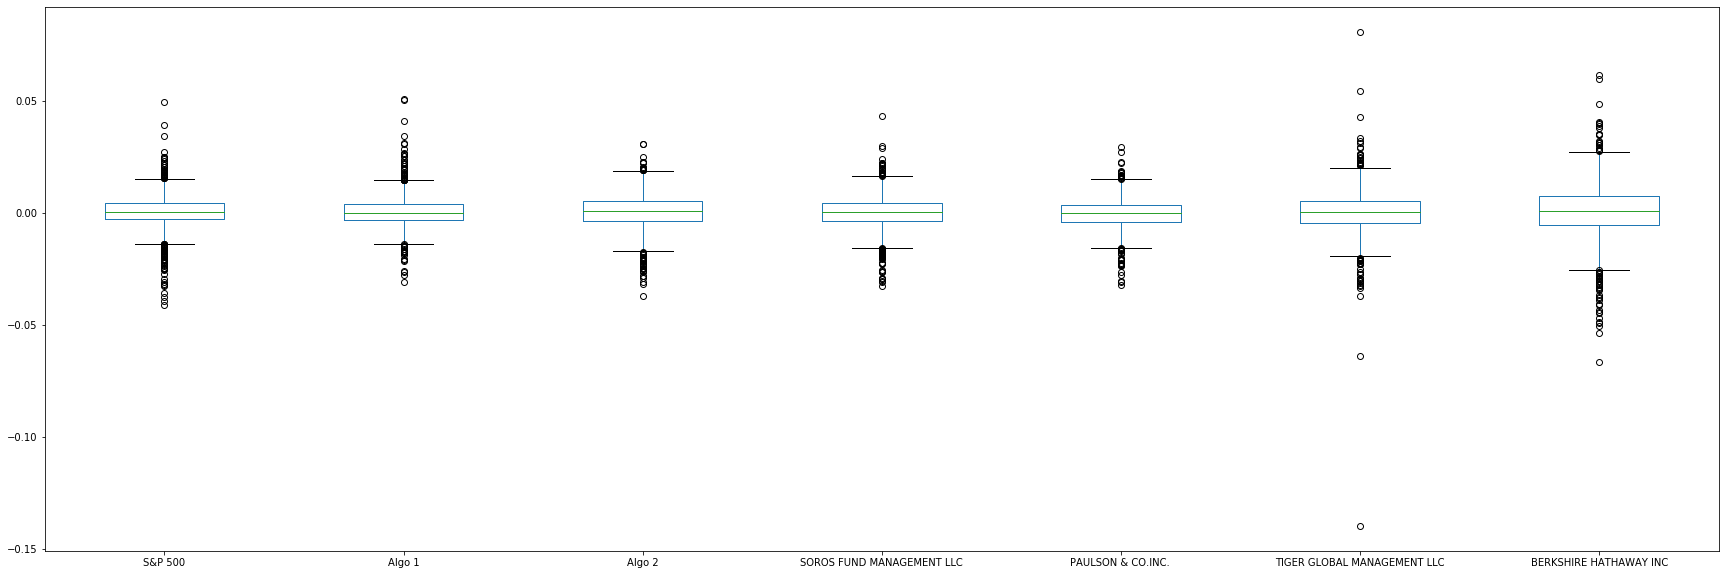

In [53]:
# Box plot of the returns to visually show risk
combined_returns.plot.box(figsize=(30,10))

### Which box has the largest spread? Which has the smallest spread?
Visually we can see that Tiger Global Management LLC has the biggest spread while Paulson & CO INC and Algo 2 have the smallest spread

In [23]:
# Daily Standard Deviations
# Calculate the daily standard deviation for each portfolio and sort from highest to lowest 
daily_std = combined_returns.std()
daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Which portfolios are riskier than the S&P 500?

By comparing the standard deviations, we can see that Berkshire Hathaway Inc (0.013) and Tiger Global Management (0.011) have higher standard deviations than the S&P 500 (0.009) and thus are more risky. 

In [48]:
#Filtering to see which portfolios have an std greater than to the std of the S&P 500
daily_std > 0.008554

S&P 500                        False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [25]:
#Calculated annualized standard deviation for each portfolio
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

## Rolling Statistics

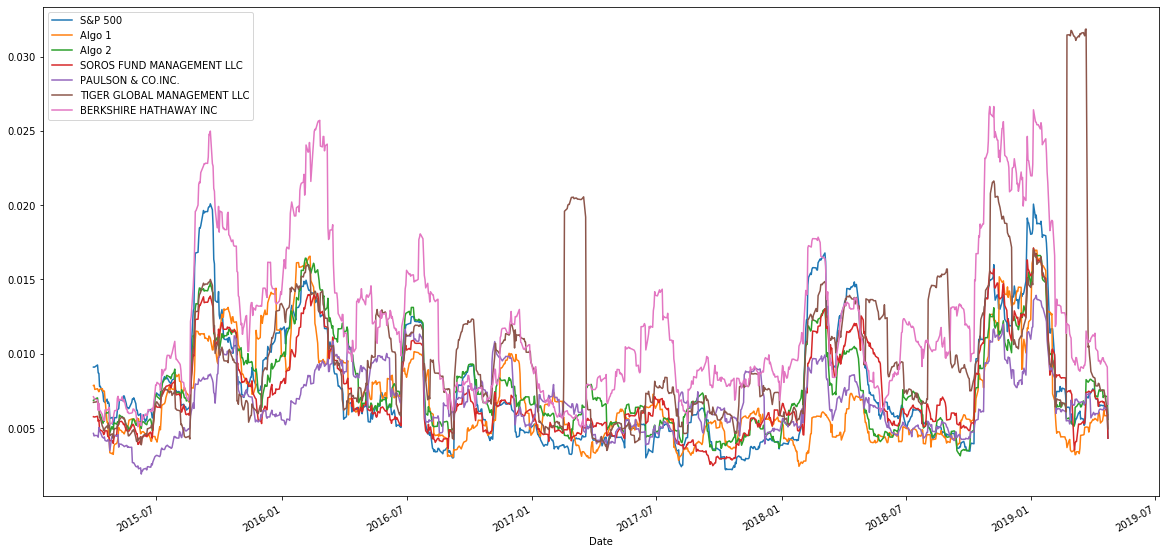

In [26]:
#Plot the rolling standard deviation of the portfolios along with the rolling standard deviation of the S&P 500 
#using a 21 day rolling window
combined_returns.rolling(window=21).std().plot(figsize=(20,10))

In [57]:
# Construct a correlation table for the algorithmic, whale, and S&P 500 returns
price_correlation = combined_returns.corr()
price_correlation.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P 500,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623


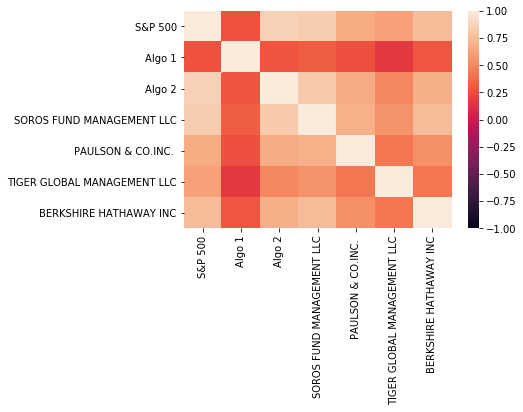

In [50]:
sns.heatmap(price_correlation,vmin=-1,vmax=1)

### Which returns most closely mimic the S&P?

Based on the correlation table and the heatmap, Algo 2 appears to most closely mimic the S&P 500

In [54]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance_algo1 = combined_returns['Algo 1'].cov(combined_returns['S&P 500'])
variance_algo1 = combined_returns['S&P 500'].var()
beta_algo1 = covariance_algo1 / variance_algo1
beta_algo1

0.24899091459425746

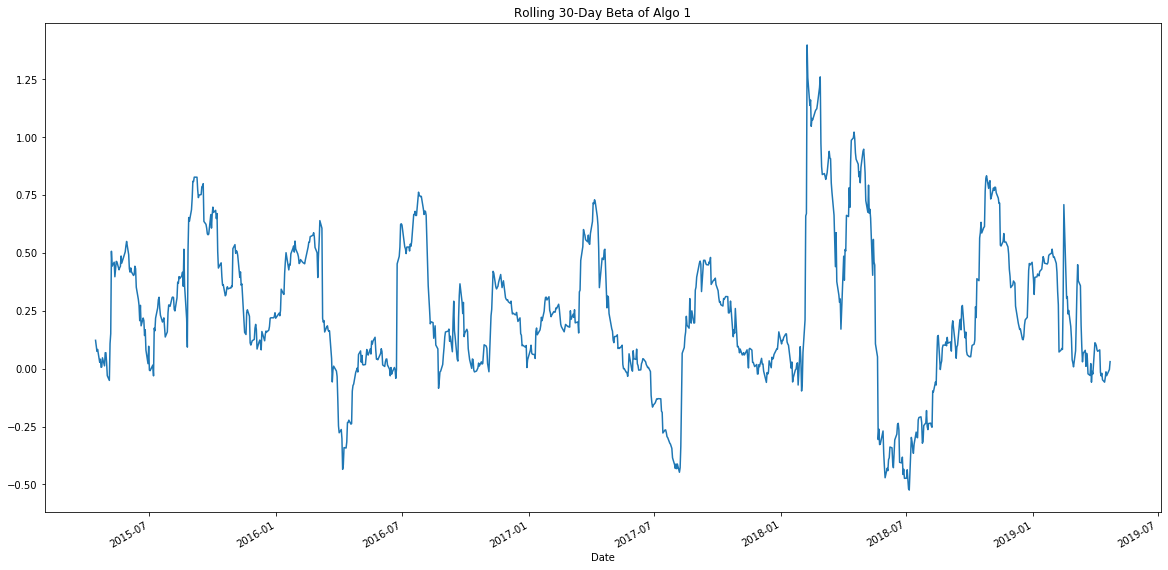

In [55]:
rolling_covariance_algo1 = combined_returns['Algo 1'].rolling(window=30).cov(combined_returns['S&P 500'])
rolling_variance_algo1 = combined_returns['Algo 1'].rolling(window=30).var()
rolling_beta_algo1 = rolling_covariance_algo1 / rolling_variance_algo1
rolling_beta_algo1.plot(figsize=(20,10),title='Rolling 30-Day Beta of Algo 1')

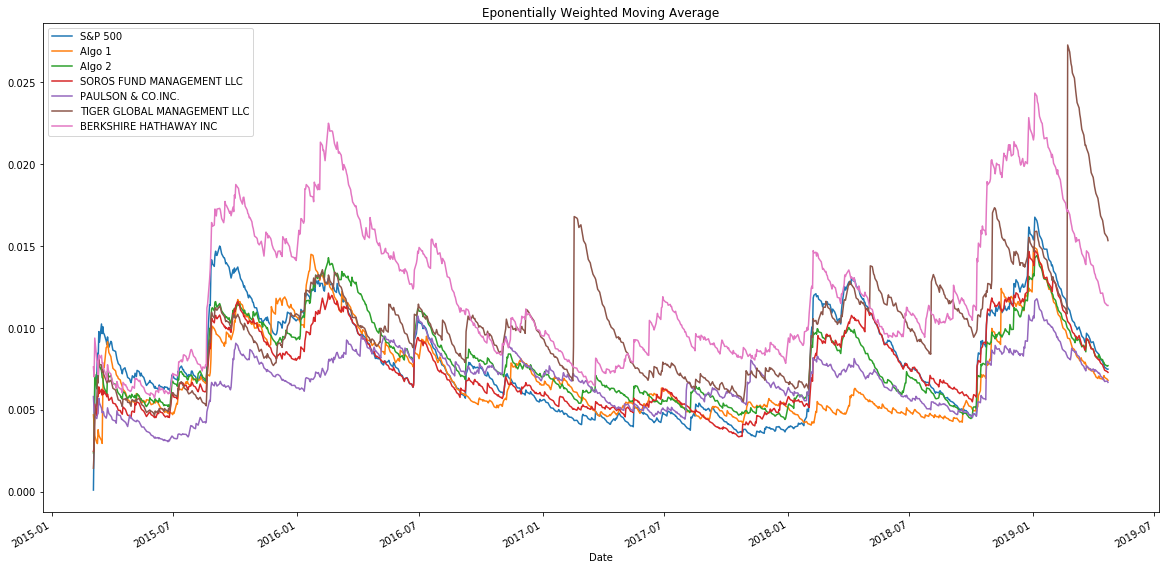

In [31]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_returns.ewm(halflife=21).std().plot(figsize=(20,10), title = "Eponentially Weighted Moving Average")

## Plot Sharpe Ratios

In [32]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

S&P 500                        0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

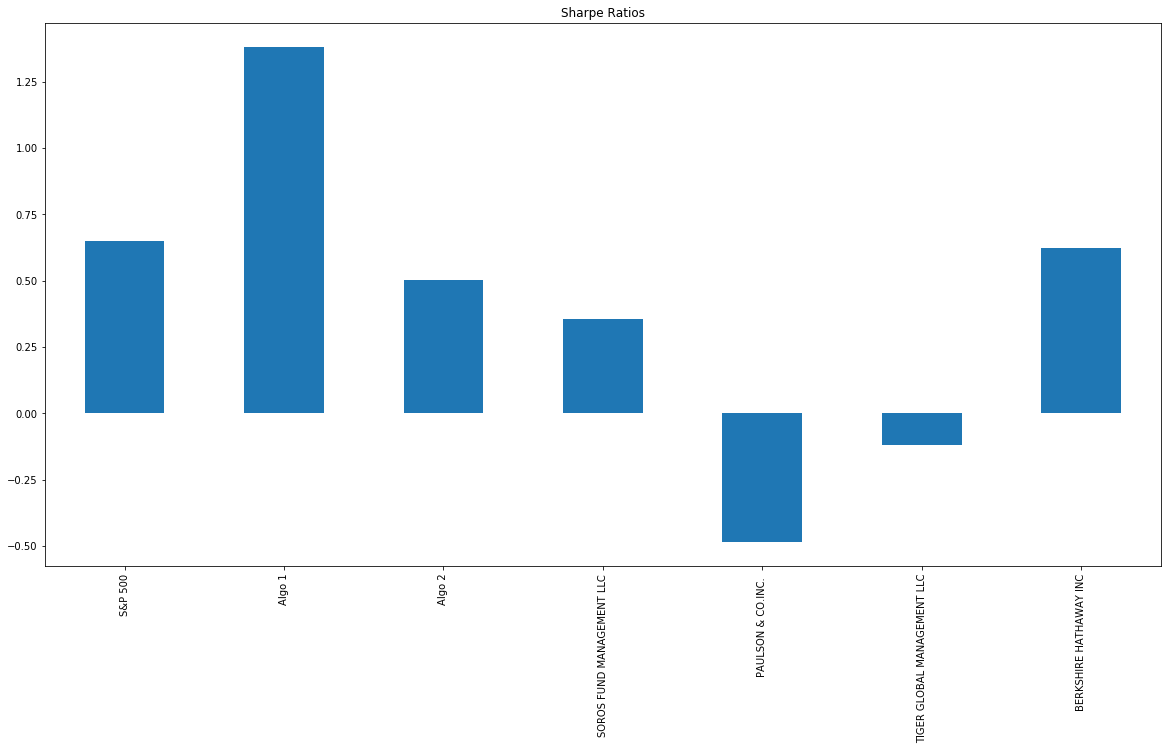

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(20,10),kind='bar', title='Sharpe Ratios')

### On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?
Based on the sharpe ratios, Algo 1 does outperform the S&P 500 and the whales portfolios. Algo 2 does not.

## Create Custom Portfolio

In [34]:
#Read in CSV's for 3 Stocks
syy_path = Path('SYY.csv')
nflx_path = Path('NFLX.csv')
sunw_path = Path('SUNW.csv')

syy = pd.read_csv(syy_path,index_col='Date',parse_dates=True,infer_datetime_format=True)
nflx = pd.read_csv(nflx_path,index_col='Date',parse_dates=True,infer_datetime_format=True)
sunw = pd.read_csv(sunw_path,index_col='Date',parse_dates=True,infer_datetime_format=True)

In [36]:
#Calculate the daily returns for each stock.
syy_returns = syy.pct_change()
nflx_returns = nflx.pct_change()
sunw_returns = sunw.pct_change()

In [58]:
#Concat all three stocks into one dataframe
my_combined_returns = pd.concat([syy_returns,nflx_returns,sunw_returns],axis='columns',join='inner')
my_combined_returns.columns =  ['SYY','NFLX','SUNW']
my_combined_returns.dropna(inplace=True)
my_combined_returns.head()

,SYY,NFLX,SUNW
Date,,,
2015-01-08,0.018069,0.022251,-0.021927
2015-01-09,0.002918,-0.015488,-0.014525
2015-01-12,-0.009212,-0.031675,-0.102531
2015-01-13,-0.002936,0.015587,0.038915
2015-01-14,-0.011779,0.001297,0.035052


In [38]:
# Calculate weighted portfolio returns (equally weighted)
weights = [1/3, 1/3, 1/3]
my_portfolio_returns = my_combined_returns.dot(weights)
my_portfolio_returns.head()

Date
2015-01-08    0.006131
2015-01-09   -0.009032
2015-01-12   -0.047806
2015-01-13    0.017189
2015-01-14    0.008190
dtype: float64

In [59]:
# Add my "Custom" portfolio to the larger dataframe of fund returns
total_portfolio_returns = pd.concat([combined_returns,my_portfolio_returns],axis='columns',join='inner')
total_portfolio_returns.rename(columns= {0: "Becca Portfolio"},inplace = True )
total_portfolio_returns.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Becca Portfolio
Date,,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.010184
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.156308
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,-0.011731
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.011447
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.029617


In [60]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio_returns.dropna(inplace=True)
total_portfolio_returns.sort_index(inplace=True)
total_portfolio_returns.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Becca Portfolio
Date,,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.010184
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.156308
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,-0.011731
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.011447
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.029617


In [41]:
# Find Risk for all the stocks in the portfolio
daily_total_portfolio_std = total_portfolio_returns.std()
total_portfolio_annualized_std = daily_total_portfolio_std * np.sqrt(252)
total_portfolio_annualized_std

S&P 500                        0.137965
Algo 1                         0.123425
Algo 2                         0.133830
SOROS FUND MANAGEMENT LLC      0.126362
PAULSON & CO.INC.              0.112289
TIGER GLOBAL MANAGEMENT LLC    0.161218
BERKSHIRE HATHAWAY INC         0.207550
Becca Portfolio                0.308719
dtype: float64

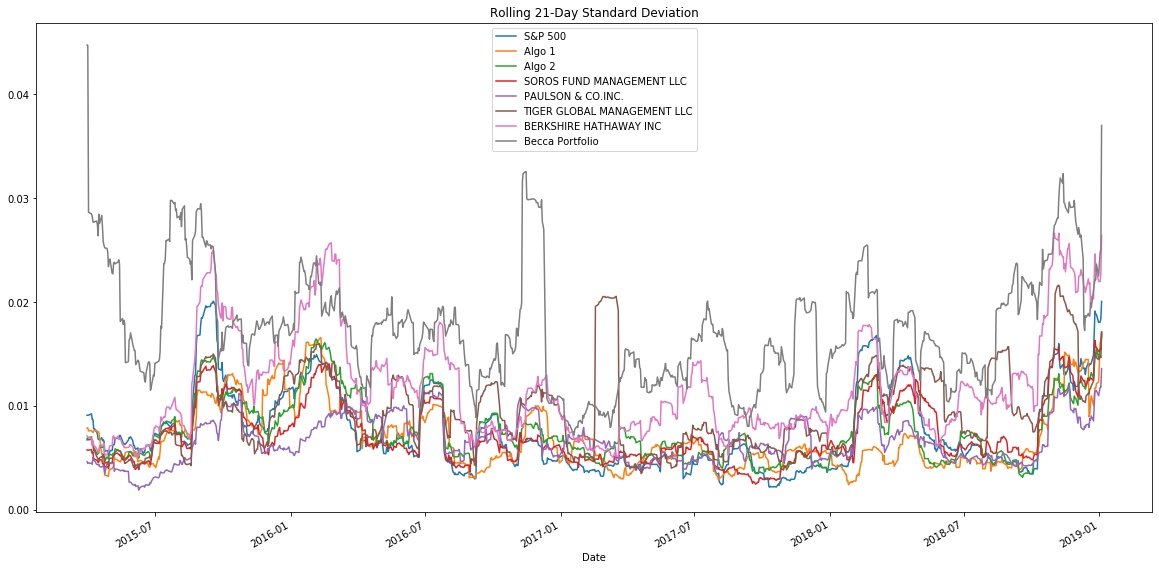

In [42]:
# Rolling Annualized Standard Deviation
rolling_annualized_total_std = total_portfolio_returns.rolling(window=21).std()
rolling_annualized_total_std.plot(figsize=(20,10),title="Rolling 21-Day Standard Deviation")

In [43]:
# Annualized Sharpe Ratios
sharpe_ratios_total = (total_portfolio_returns.mean() * 252) / (total_portfolio_returns.std() * np.sqrt(252)) 
sharpe_ratios_total

S&P 500                        0.406138
Algo 1                         1.321997
Algo 2                         0.210543
SOROS FUND MANAGEMENT LLC      0.057876
PAULSON & CO.INC.             -0.653720
TIGER GLOBAL MANAGEMENT LLC   -0.045138
BERKSHIRE HATHAWAY INC         0.355120
Becca Portfolio                0.167953
dtype: float64

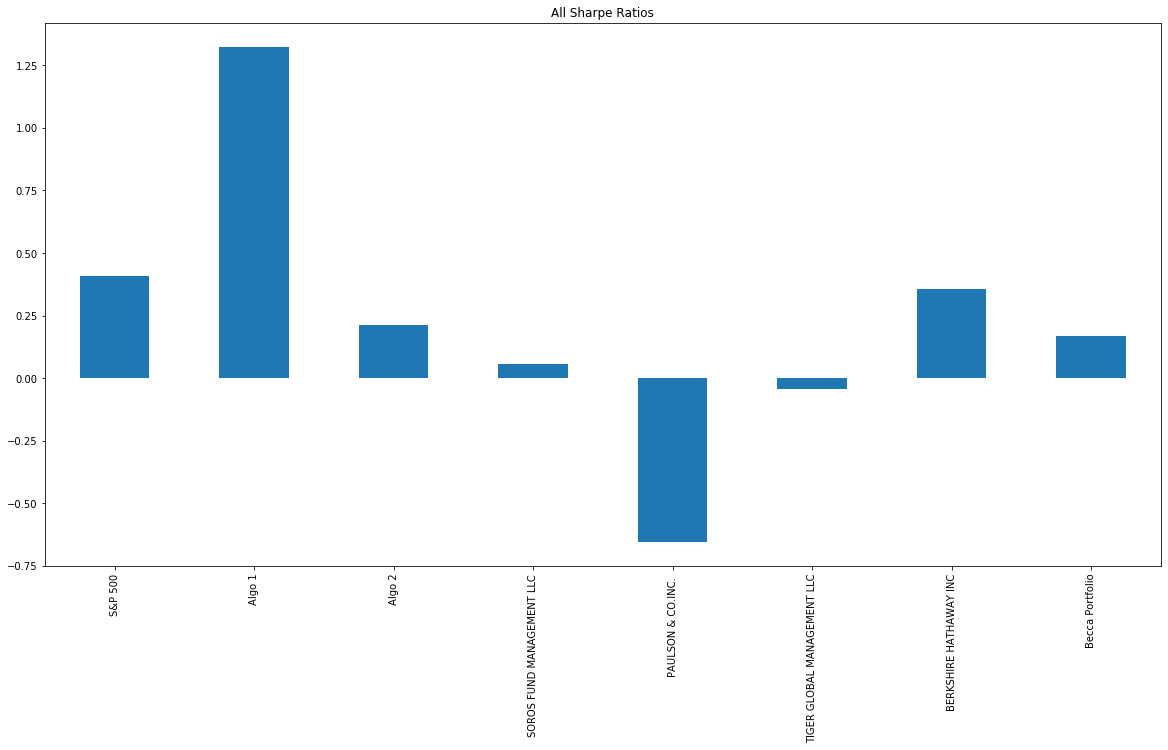

In [47]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_total.plot(figsize=(20,10),kind='bar',title='All Sharpe Ratios')

In [45]:
# Create a correlation analysis
total_portfolio_returns.corr()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Becca Portfolio
S&P 500,1.000000,0.285669,0.858703,0.841877,0.671745,0.694158,0.748457,0.444501
Algo 1,0.285669,1.000000,0.298500,0.335972,0.278955,0.189793,0.299256,0.181128
Algo 2,0.858703,0.298500,1.000000,0.829755,0.678178,0.569017,0.686051,0.417087
SOROS FUND MANAGEMENT LLC,0.841877,0.335972,0.829755,1.000000,0.700235,0.610612,0.757919,0.407957
PAULSON & CO.INC.,0.671745,0.278955,0.678178,0.700235,1.000000,0.475881,0.547480,0.311963
TIGER GLOBAL MANAGEMENT LLC,0.694158,0.189793,0.569017,0.610612,0.475881,1.000000,0.484429,0.325194
BERKSHIRE HATHAWAY INC,0.748457,0.299256,0.686051,0.757919,0.547480,0.484429,1.000000,0.474199
Becca Portfolio,0.444501,0.181128,0.417087,0.407957,0.311963,0.325194,0.474199,1.000000


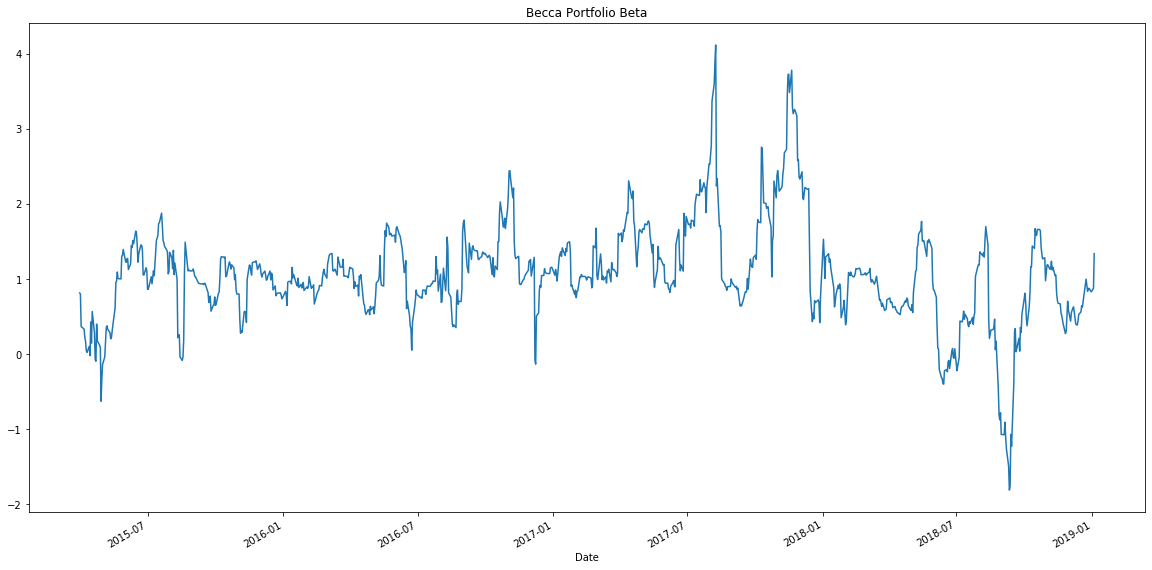

In [46]:
# Beta for Becca Portfolio
becca_rolling_covariance = total_portfolio_returns['Becca Portfolio'].rolling(window=21).cov(total_portfolio_returns['S&P 500'])
becca_rolling_variance = total_portfolio_returns['S&P 500'].rolling(window=21).var()
becca_rolling_beta = becca_rolling_covariance / becca_rolling_variance
becca_rolling_beta.plot(figsize=(20,10),title="Becca Portfolio Beta")

### created by Rebecca Gerdon